In [1]:
import numpy as np
import heapq 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import queue
import heapq
from collections import defaultdict

In [2]:
from skimage.draw import line_nd, random_shapes

In [3]:
from skimage.draw import line_nd, random_shapes
import queue
import heapq
from collections import defaultdict

class RRT:

    def __init__(self, map_):
        self.map_ = map_
        self.nr = map_.shape[0]
        self.nc = map_.shape[1]
        self.dL = 10
        self.kmax = 500
        
    def resetDL(self, dL):
        self.dL = dL
        
    def resetKmax(self, val):
        self.kmax = val
    def resetMap(self, map_):
        self.map_[:,:] = map_[:,:]
        

    def setRandomQ(self):
        
        rr = np.random.randint(self.nr)
        rc = np.random.randint(self.nc)
        
        return (rr, rc)
    
    
    
    def getNewPoint(self, p, q):
        
        dx = q[0] - p[0]
        dy = q[1] - p[1]
        
        L = np.sqrt(dx**2 + dy**2)
        
        if L == 0:
            return p
            
        
    
        ratio = self.dL/L
        
        if ratio > 1:
            return q
        
        vx = dx*ratio
        vy = dy*ratio
        
        newx = p[0] + vx
        newy = p[1] + vy
        
        newx_int = int(np.round(newx))
        newy_int = int(np.round(newy))
        
        return (newx_int, newy_int)
    
    def calDistance(self, q1, q2):
        dist = (q1[0] - q2[0])**2 + (q1[1] - q2[1])**2
        return np.sqrt(dist)
    
    def findNearestQ(self, G, q):
        
        min_dist = 100000.
        
        p_near = None
        for p in G.keys():
            dist = self.calDistance(p, q)
            
            if dist < min_dist:
                p_near = p
                min_dist = dist
    
        
        return p_near
                
    def drawLine(self, p1, p2):
        return line_nd(p1,p2,integer=True)
    
    def noCollision(self, xline, yline):
        
        for i in range(xline.shape[0]):
            if not self.map_[xline[i], yline[i]]:
                return False
            
            
        return True
    
    
    def A_star(self, start, goal, G):

        distances=defaultdict(lambda:float("inf"))

        Q = []
        heapq.heapify(Q)    

        cost = 0 + self.calDistance(start, goal)

        heapq.heappush(Q, (cost, 0, start))

        distances[start] = cost
        parent = {}

        visited = {}
        for key in G.keys():
            visited[key]=False

        current_node = start

        while not((len(Q) <= 0) or (current_node == goal)):
            cost, current_dist, current_node = heapq.heappop(Q)    
            visited[current_node] = True

            neighbours = G[current_node]

            for neigh in neighbours:

                if (not visited[neigh]):
                    dL = RT.dL
                    next_dist = current_dist + dL 
                    next_cost = next_dist + self.calDistance(neigh, goal)
                    if next_dist < distances[neigh]: 
                        distances[neigh] = next_dist
                        heapq.heappush(Q, (next_cost, next_dist, neigh))
                        parent[neigh] = current_node

        if current_node != goal:
            return None#, None

        route = []
        cn = goal
        while cn != start:
            route.append(cn)
            cn = parent[cn]

        route.append(cn)
        return route[::-1] #, visited
    
    
    def execute(self, start, goal):
        
        G={start : []}
 
        newP = start
        k = 0
        while not((k > self.kmax) or (newP == goal)):
            
            #find random poin
            q = self.setRandomQ()
            if np.random.rand()< 0.1:
                q = goal
            
            #nearest point to q in G
            
            nearestP = self.findNearestQ(G, q)
            
            newP = self.getNewPoint(nearestP, q)
            
            #newP is close to the goal?
            distToGoal = self.calDistance(newP, goal)
            if distToGoal < self.dL/2:
                newP = goal
            
            #draw line
            xline, yline = self.drawLine(nearestP, newP)
            
            #check collision
            check = self.noCollision(xline, yline)
            
            if check:
                G[nearestP].append(newP)
                G[newP] = []
            
            k += 1
            
        route = self.A_star(start, goal, G)
                
        return route, G


In [4]:
map_, labels = random_shapes((200,300),20,5,num_channels=1)

In [5]:
RT = RRT(map_ == 255)
RT.resetDL(30)
RT.resetKmax(5000)

In [7]:
np.random.seed(2)
qstart = (100,150)
qgoal = (np.random.randint(0,len(map_)),np.random.randint(0,len(map_[0])))
qstart, qgoal

((100, 150), (168, 15))

In [206]:
route, G = RT.execute(qstart, qgoal)

In [207]:
len(G)

35

In [208]:
np.random.rand()

0.18161125142253787

In [209]:
len(route)

12

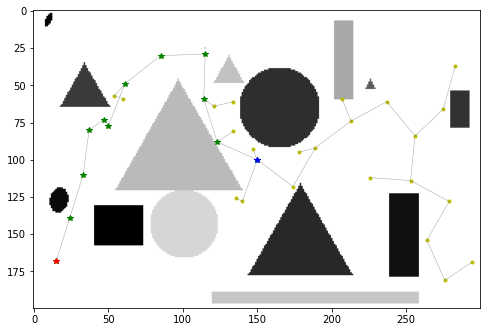

In [210]:
fig, ax = plt.subplots(figsize = (8,6))
map2 = map_.copy()

plt.imshow(map2, cmap = "gray")


for point in G.keys():
    plt.plot(point[1], point[0], "y.")
    

for key in G.keys():
    p1 = key
    
    for p2 in G[p1]:
        if p2 != []:
            plt.plot([p1[1], p2[1]], [p1[0], p2[0]], color = "gray", lw = 0.5, alpha = 0.7)


for point in route:
    plt.plot(point[1], point[0], "g*")
    


plt.plot(qstart[1], qstart[0], "b*")
plt.plot(qgoal[1], qgoal[0], "r*")
